# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `species` using the other variables in the dataset.

**Dummify** all variables that require this.

In [2]:
import pandas as pd
import numpy as np
! pip install palmerpenguins
from palmerpenguins import load_penguins

from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from plotnine import ggplot, aes, geom_line

In [3]:
# Code Here

penguin = load_penguins()

penguin = penguin.dropna()

penguin['year'] = penguin['year'].astype(object)

X = penguin.drop(['species'], axis = 1)
y = penguin['species']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42, stratify = y)
ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
).set_output(transform = "pandas")
knn = KNeighborsClassifier()

KNN_pipeline = Pipeline(
    [("preprocessing", ct),
     ("KNN", knn)]
)
dt = DecisionTreeClassifier()

DT_pipeline = Pipeline(
    [("preprocessing", ct),
     ("DT", dt)]
)

Let's use the other variables to predict `species`. Prepare your data and fit the following models on the entire dataset:

* Two kNN models (for different values of K)
* Two decision tree models (for different complexities of trees)

Compute the following, for each of your models, on test data. Keep in mind that you may need to stratify your creation of the training and test data.

* Confusion matrix
* Overall Accuracy
* Precision, Recall, AUC, and F1-score for each species

Create one ROC plot for the species of your choice.

In [4]:
# Code Here
knn = KNeighborsClassifier(n_neighbors=1)

KNN_pipeline = Pipeline(
    [("preprocessing", ct),
     ("KNN", knn)]
)

fitted = KNN_pipeline.fit(X_train ,y_train)

predict = fitted.predict(X_test)

print(fitted.score(X_test, y_test))

print(confusion_matrix(y_test, predict))

precision = cross_val_score(KNN_pipeline, X_train, y_train, cv=5, scoring='precision_weighted')
print(precision.mean())

recall = cross_val_score(KNN_pipeline, X_train, y_train, cv=5, scoring='recall_weighted')
print(recall.mean())

f1 = cross_val_score(KNN_pipeline, X_train, y_train, cv=5, scoring='f1_weighted')
print(f1.mean())

auc = cross_val_score(KNN_pipeline, X_train, y_train, cv=5, scoring='roc_auc_ovr')
print(auc.mean())

0.9761904761904762
[[36  1  0]
 [ 1 16  0]
 [ 0  0 30]]
0.9849667123766503
0.9839183673469387
0.9838823912230698
0.9861178019511353


In [5]:
knn = KNeighborsClassifier(n_neighbors=7)


KNN_pipeline = Pipeline(
    [("preprocessing", ct),
     ("KNN", knn)]
)

fitted = KNN_pipeline.fit(X_train ,y_train)

predict = fitted.predict(X_test)

print(fitted.score(X_test, y_test))

print(confusion_matrix(y_test, predict))

precision = cross_val_score(KNN_pipeline, X_train, y_train, cv=5, scoring='precision_weighted')
print(precision.mean())

recall = cross_val_score(KNN_pipeline, X_train, y_train, cv=5, scoring='recall_weighted')
print(recall.mean())

f1 = cross_val_score(KNN_pipeline, X_train, y_train, cv=5, scoring='f1_weighted')
print(f1.mean())

auc = cross_val_score(KNN_pipeline, X_train, y_train, cv=5, scoring='roc_auc_ovr')
print(auc.mean())

1.0
[[37  0  0]
 [ 0 17  0]
 [ 0  0 30]]
0.988762496302869
0.9879183673469388
0.9875857760342885
0.9998584131917465


In [6]:
dt = DecisionTreeClassifier(max_depth = 2)

DT_pipeline = Pipeline(
    [("preprocessing", ct),
     ("DT", dt)]
)

fitted = DT_pipeline.fit(X_train ,y_train)

predict = fitted.predict(X_test)

print(fitted.score(X_test, y_test))

print(confusion_matrix(y_test, predict))

precision = cross_val_score(KNN_pipeline, X_train, y_train, cv=5, scoring='precision_weighted')
print(precision.mean())

recall = cross_val_score(KNN_pipeline, X_train, y_train, cv=5, scoring='recall_weighted')
print(recall.mean())

f1 = cross_val_score(KNN_pipeline, X_train, y_train, cv=5, scoring='f1_weighted')
print(f1.mean())

auc = cross_val_score

0.9523809523809523
[[36  1  0]
 [ 1 16  0]
 [ 0  2 28]]
0.988762496302869
0.9879183673469388
0.9875857760342885


In [7]:
dt = DecisionTreeClassifier(max_depth = 10)

DT_pipeline = Pipeline(
    [("preprocessing", ct),
     ("DT", dt)]
)

fitted = DT_pipeline.fit(X_train ,y_train)

predict = fitted.predict(X_test)

print(fitted.score(X_test, y_test))

print(confusion_matrix(y_test, predict))

precision = cross_val_score(KNN_pipeline, X_train, y_train, cv=5, scoring='precision_weighted')
print(precision.mean())

recall = cross_val_score(KNN_pipeline, X_train, y_train, cv=5, scoring='recall_weighted')
print(recall.mean())

f1 = cross_val_score(KNN_pipeline, X_train, y_train, cv=5, scoring='f1_weighted')
print(f1.mean())

auc = cross_val_score(KNN_pipeline, X_train, y_train, cv=5, scoring='roc_auc_ovr')
print(auc.mean())

0.9404761904761905
[[34  3  0]
 [ 0 17  0]
 [ 2  0 28]]
0.988762496302869
0.9879183673469388
0.9875857760342885
0.9998584131917465


In [8]:
X = penguin.drop(['species'], axis = 1)
y = penguin['species'].apply(lambda x: 1 if x == "Adelie" else 0)

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42, stratify = y)

dt = DecisionTreeClassifier(max_depth = 10)

DT_pipeline = Pipeline(
    [("preprocessing", ct),
     ("DT", dt)]
)

fitted = DT_pipeline.fit(X_train ,y_train)

predict = fitted.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, predict, pos_label=1)

df = pd.DataFrame({"true":tpr, "false":fpr})

df

,true,false
0,0.000000,0.000000
1,0.945946,0.021277
2,1.000000,1.000000


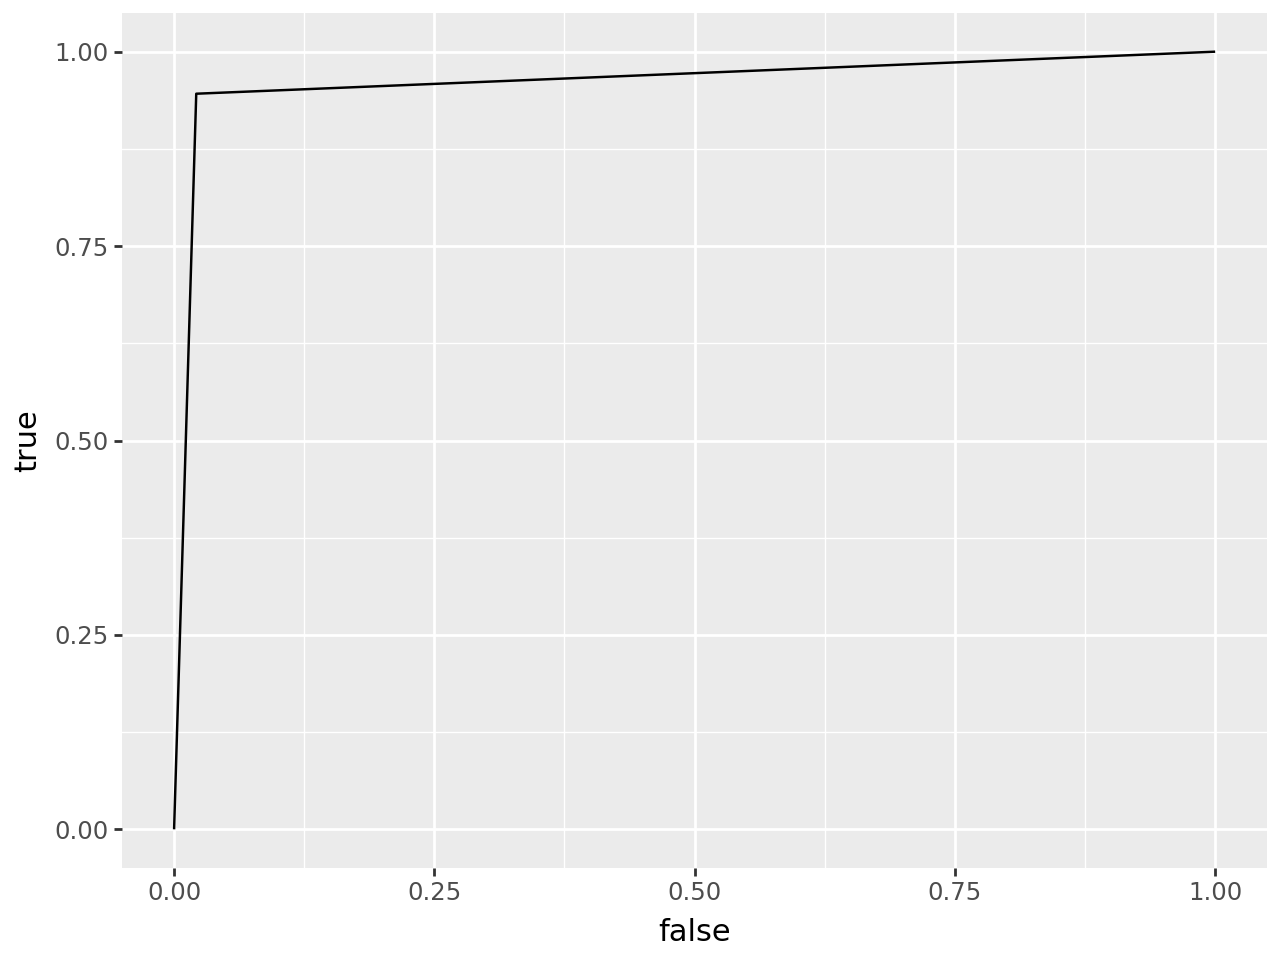

In [9]:
(ggplot(df)
    + geom_line(aes(x = 'false', y='true')))